In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc
from keras.models import load_model
from collections import Counter
import tensorflow as tf

In [2]:
student_performance=pd.read_csv('Student_Performance.csv')
score_range=pd.read_csv('score_range.csv')
dropout=pd.read_csv('dropout_risk.csv')
topic=pd.read_csv('topic_detection.csv')

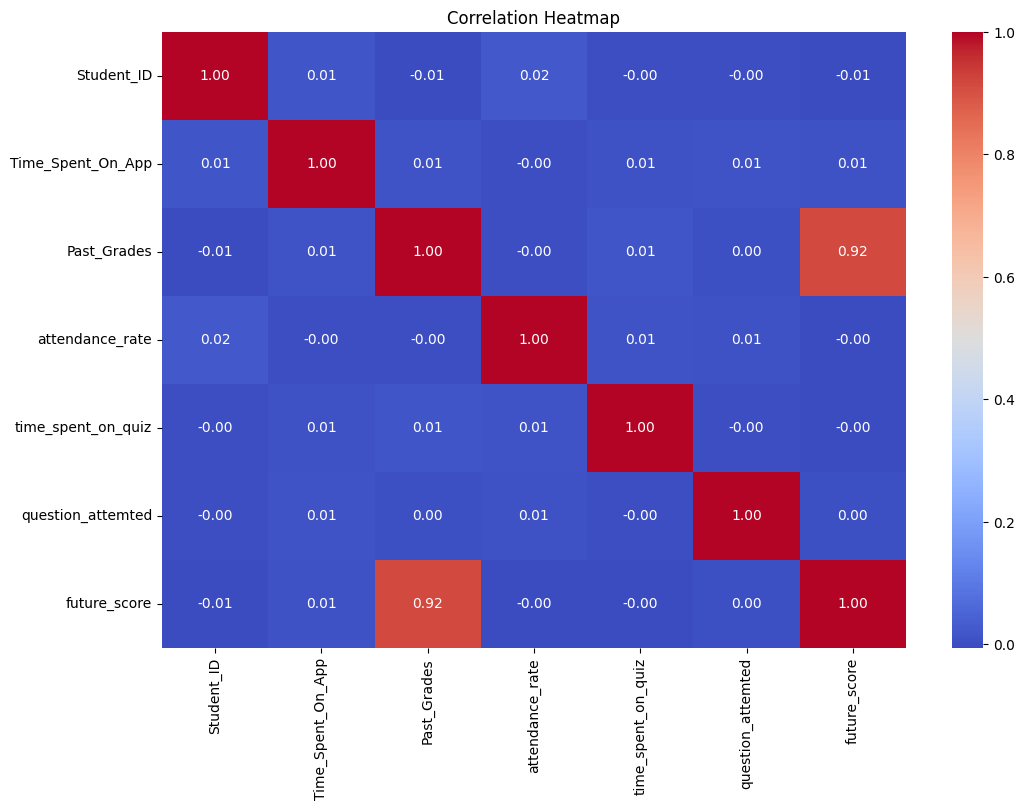

In [4]:
numeric_df = student_performance.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(),annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

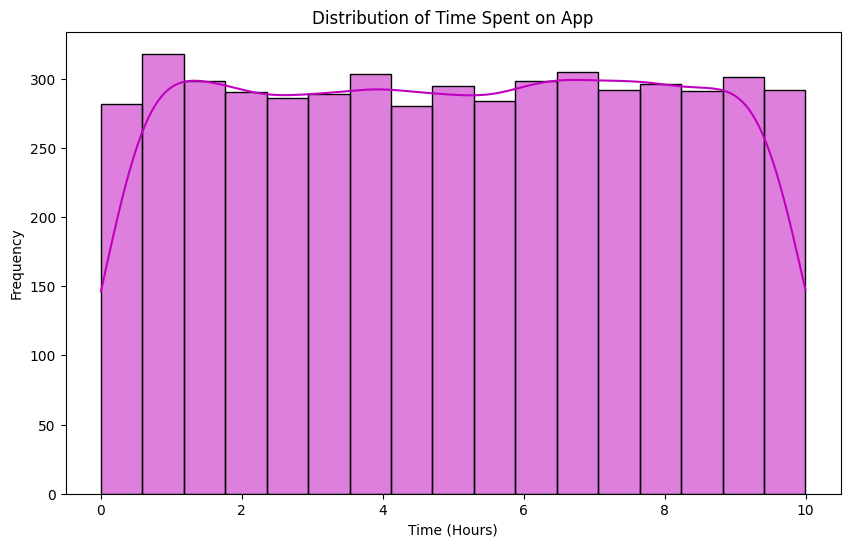

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(student_performance['Time_Spent_On_App'], kde=True, color="m")
plt.title('Distribution of Time Spent on App')
plt.xlabel('Time (Hours)')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='count', ylabel='Student_ID'>

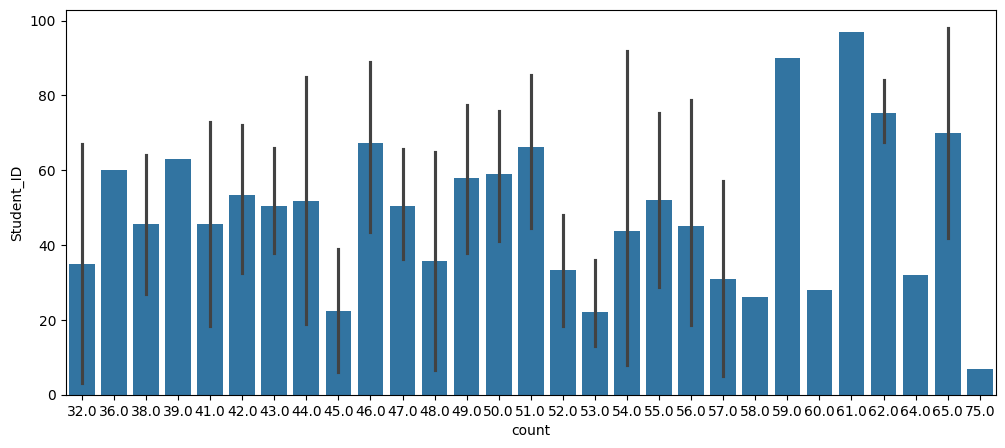

In [5]:
plt.figure(figsize=(12,5))
grade=student_performance['Past_Grades'].value_counts()
sns.barplot(data=student_performance,x=grade,y='Student_ID')

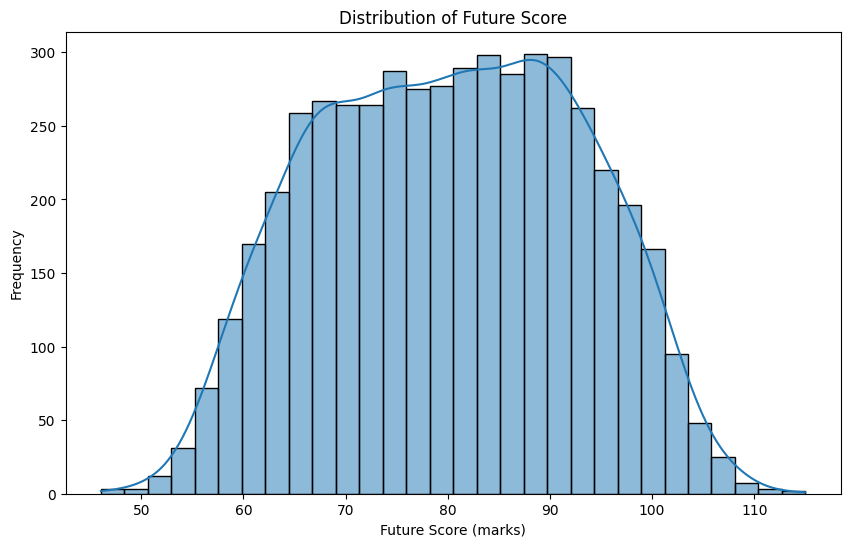

In [6]:
# Plotting Delivery Time 
plt.figure(figsize=(10, 6))
sns.histplot(score_range['future_score'], kde=True, bins=30)
plt.title('Distribution of Future Score')
plt.xlabel('Future Score (marks)')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='pass_fail', ylabel='future_score'>

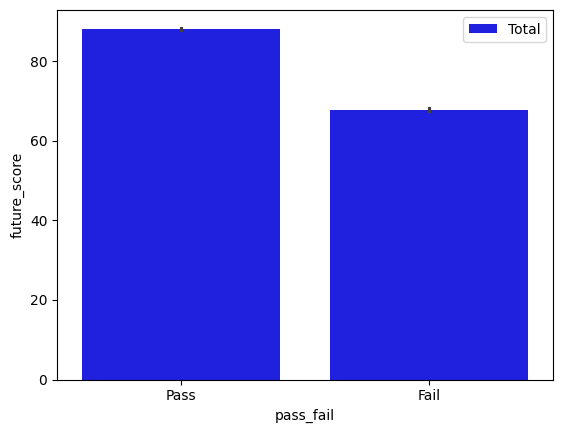

In [7]:
sns.barplot(x="pass_fail", y="future_score", data=score_range, label="Total", color="b")

C:\Users\simra\AppData\Local\Temp\ipykernel_13264\3603450941.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Past_Grades',y='topic_difficulty',data=score_range, palette='husl')


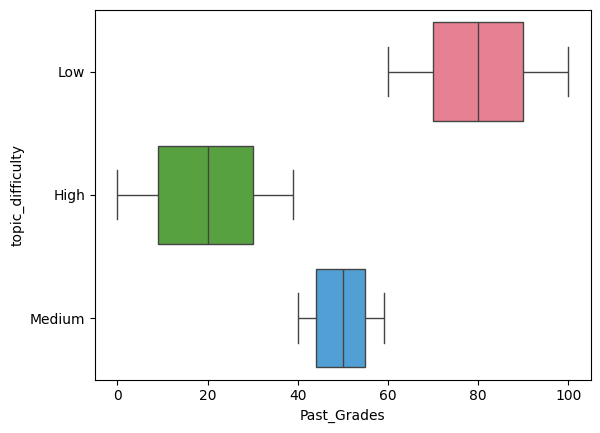

In [9]:
sns.boxplot(x='Past_Grades',y='topic_difficulty',data=score_range, palette='husl')
plt.show()

Text(0, 0.5, 'Time Spent on Quiz')

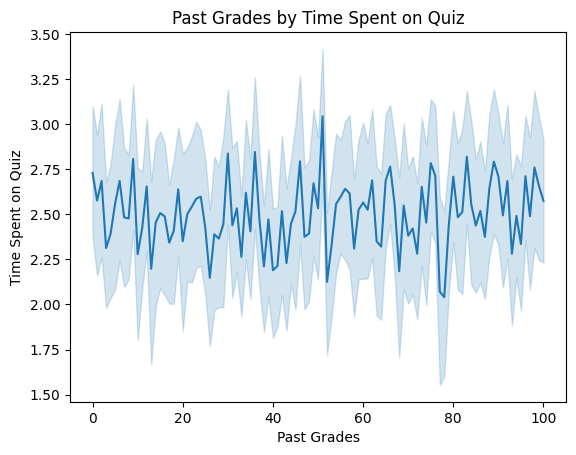

In [11]:
sns.lineplot(data=score_range, x='Past_Grades',y='time_spent_on_quiz')
plt.title('Past Grades by Time Spent on Quiz')
plt.xlabel('Past Grades')
plt.ylabel('Time Spent on Quiz')

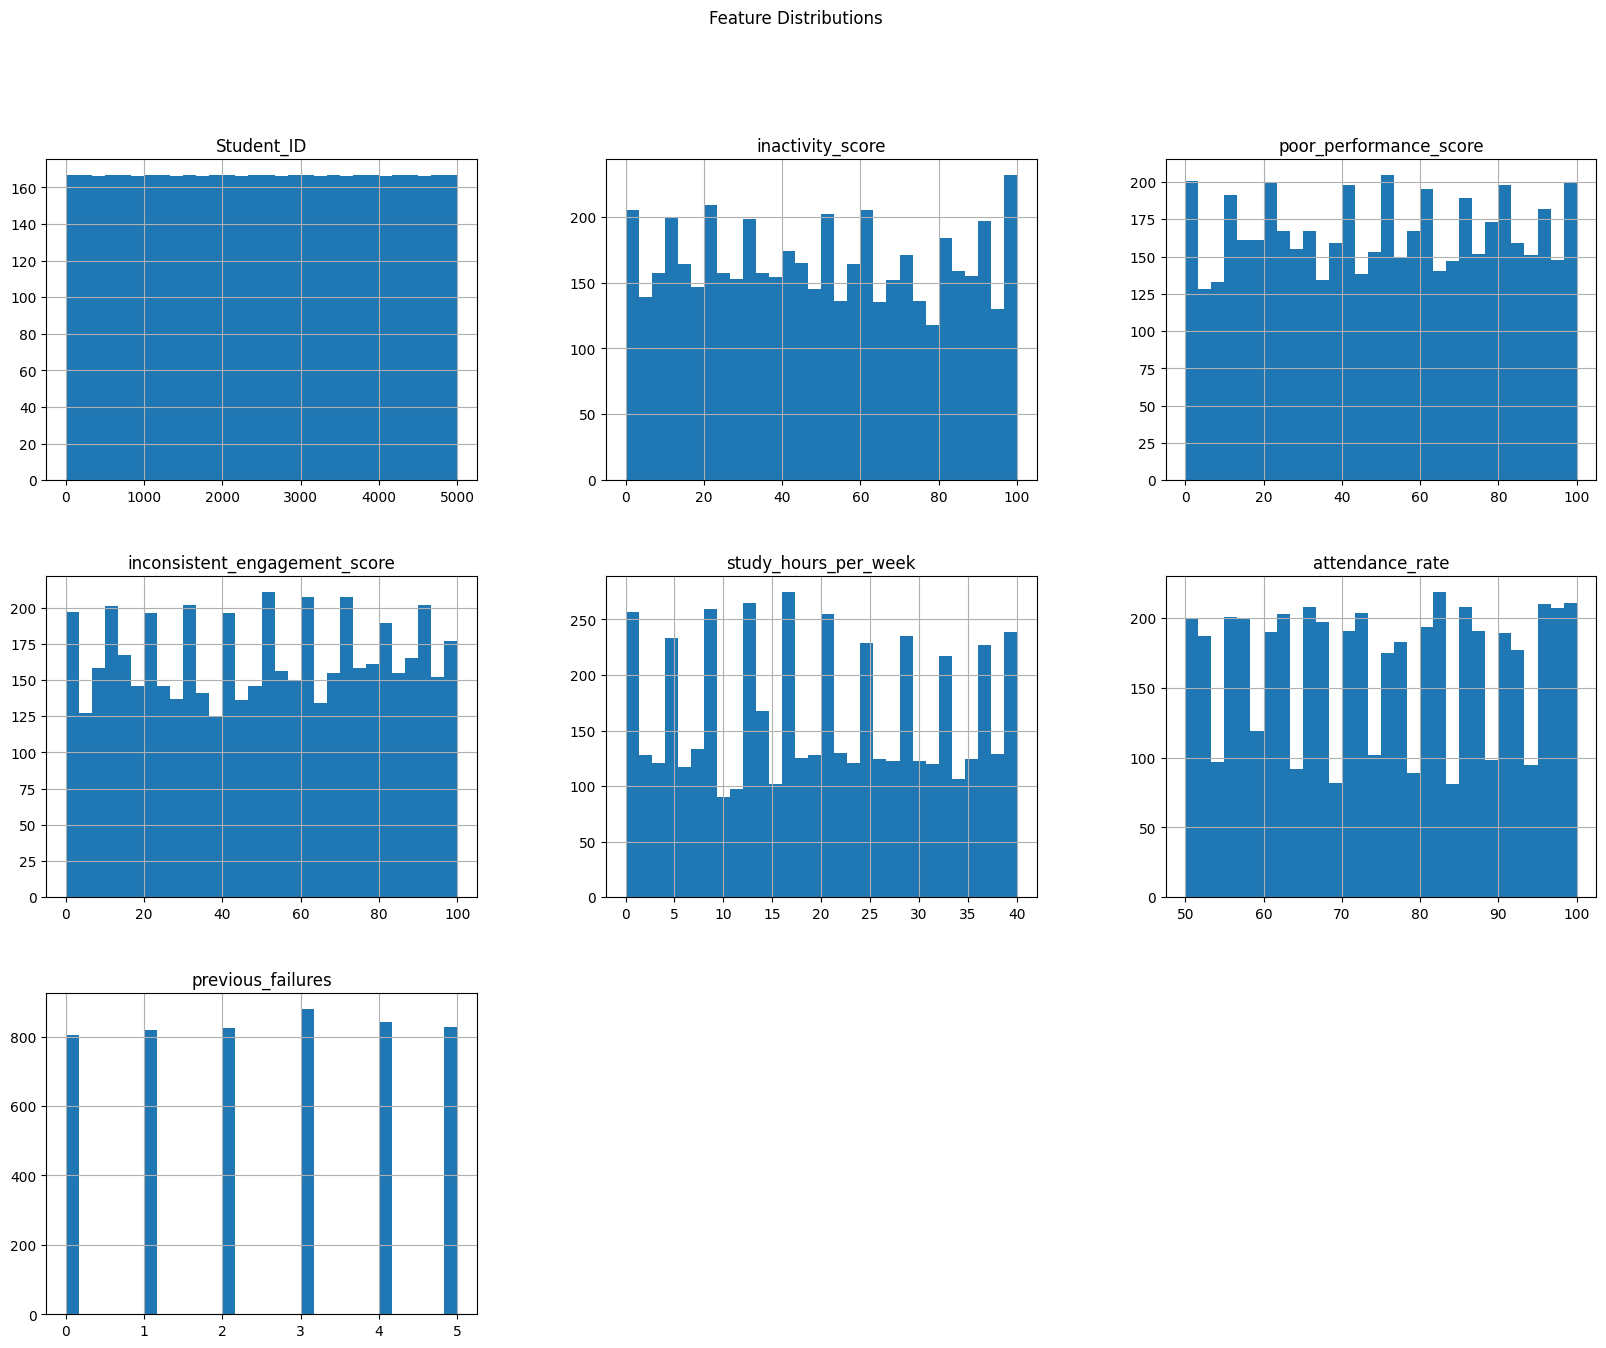

In [70]:
feature_columns = dropout.columns[:-1]
dropout[feature_columns].hist(bins=30, figsize=(20, 15))
plt.suptitle('Feature Distributions')
plt.show()

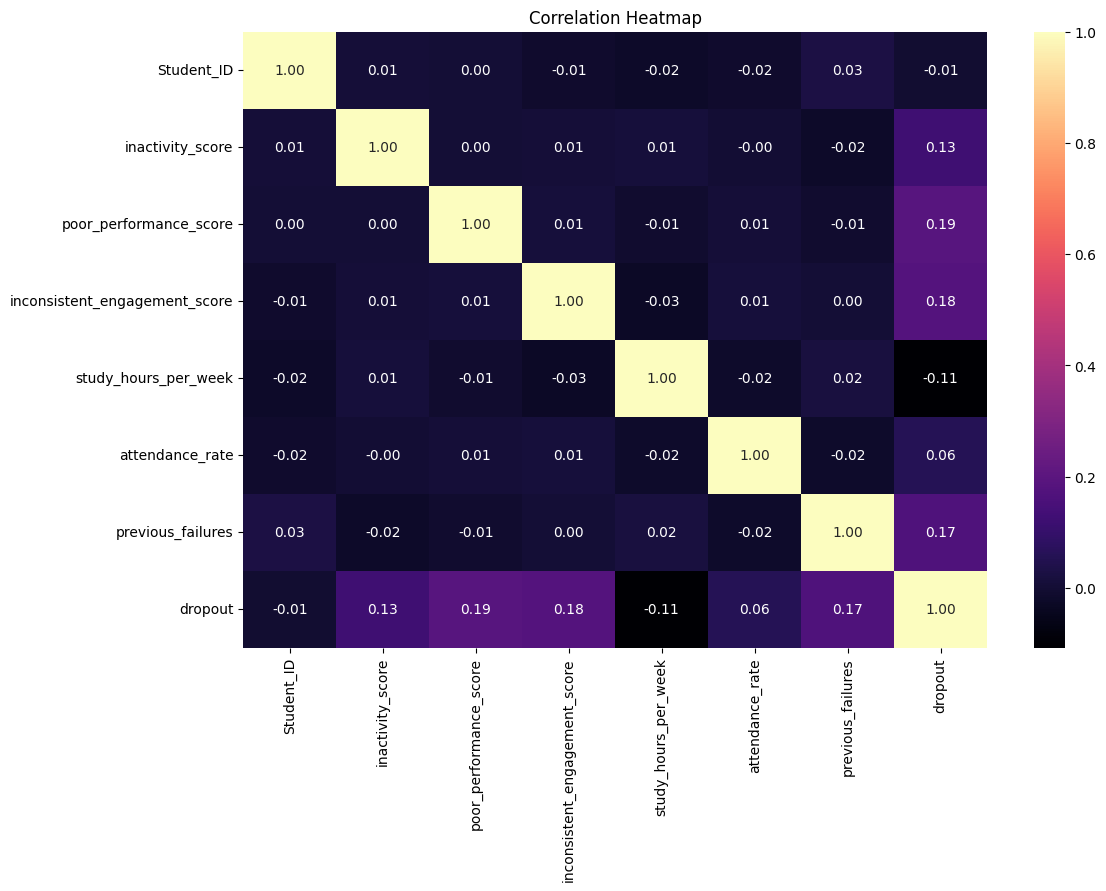

In [24]:
# numeric_df = s.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(dropout.corr(), annot=True, cmap='magma', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Feature Importances:
                         feature  importance
6              previous_failures    0.190780
2         poor_performance_score    0.149543
3  inconsistent_engagement_score    0.144477
1               inactivity_score    0.141089
4           study_hours_per_week    0.130404
5                attendance_rate    0.126269
0                     Student_ID    0.117438


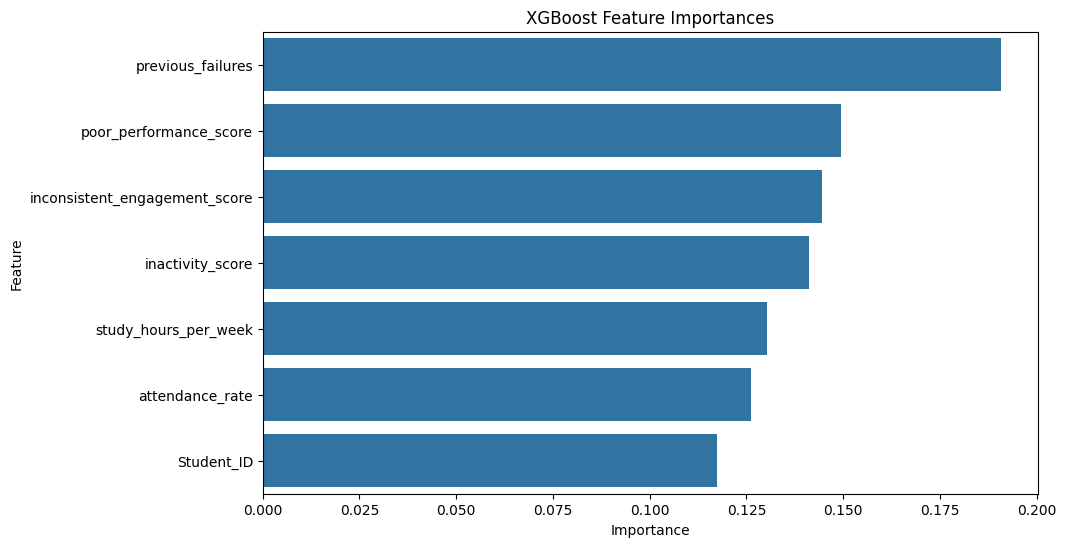

In [27]:
# --- Analyze Model Importance (as requested in the image) ---
X = dropout.drop('dropout', axis=1)
y = dropout['dropout']

model= pickle.load(open('XGB_classifier.pkl', 'rb'))
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Feature Importances:")
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

print(feature_importances)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('XGBoost Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Plotting Precision-Recall Curve...


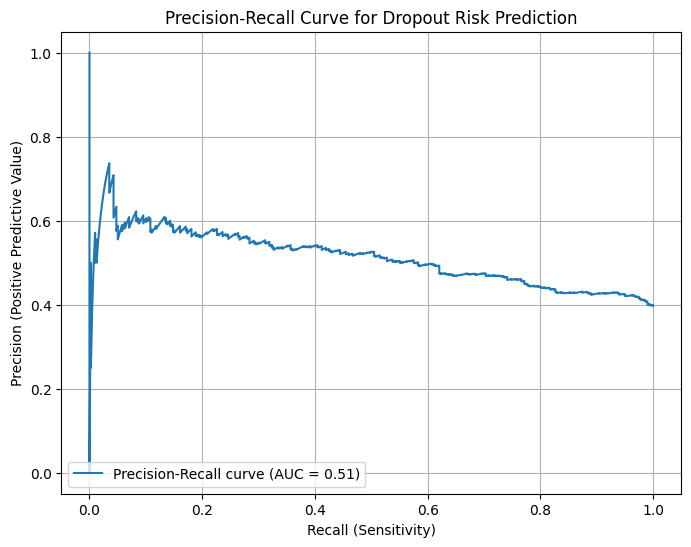

In [30]:
# --- 4. Plot Precision-Recall Curve ---
print("Plotting Precision-Recall Curve...")
y_prob = model.predict_proba(X_test)[:, 1] 
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision (Positive Predictive Value)')
plt.title('Precision-Recall Curve for Dropout Risk Prediction')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

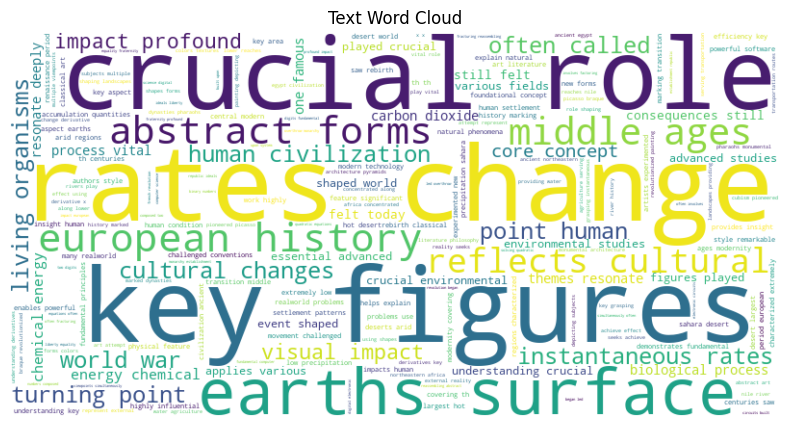

In [6]:
import re
from wordcloud import STOPWORDS

text = ' '.join(topic['text'].astype(str).tolist())

text = re.sub(r'[^A-Za-z\s]', '', text)

text = text.lower()

stopwords = set(STOPWORDS)
text = ' '.join(word for word in text.split() if word not in stopwords)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("Text Word Cloud")
plt.show()

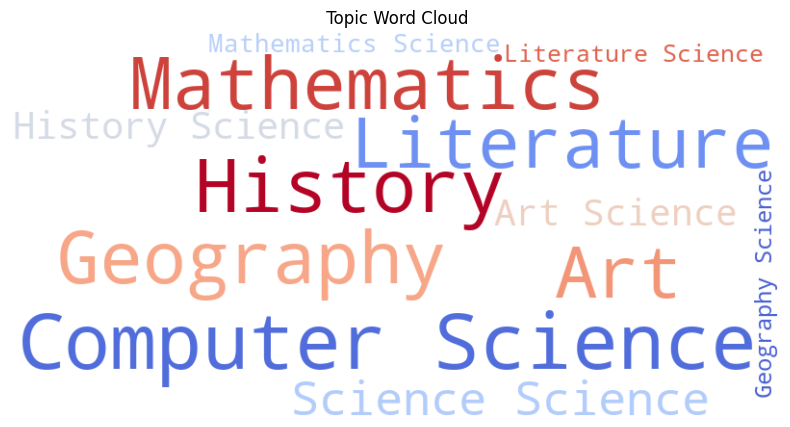

In [11]:
text = ' '.join(topic['label'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, colormap='coolwarm').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(" Topic Word Cloud")
plt.show()


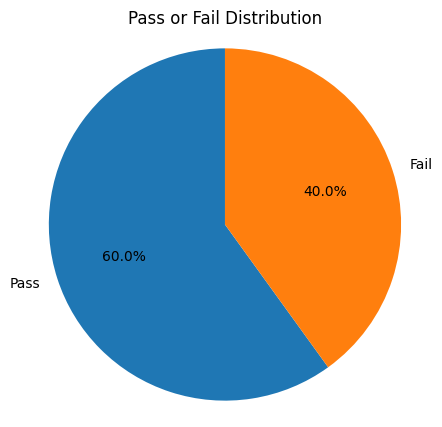

In [5]:
# Plotting data for female and male
gender_counts = student_performance['pass_fail'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(gender_counts, labels= gender_counts.index,autopct='%1.1f%%', startangle=90)
plt.title('Pass or Fail Distribution')
plt.axis('equal')
plt.show()


### 2. Topic Distribution



C:\Users\simra\AppData\Local\Temp\ipykernel_13264\1788011783.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='label', data=topic, order=topic['label'].value_counts().index, palette='viridis')


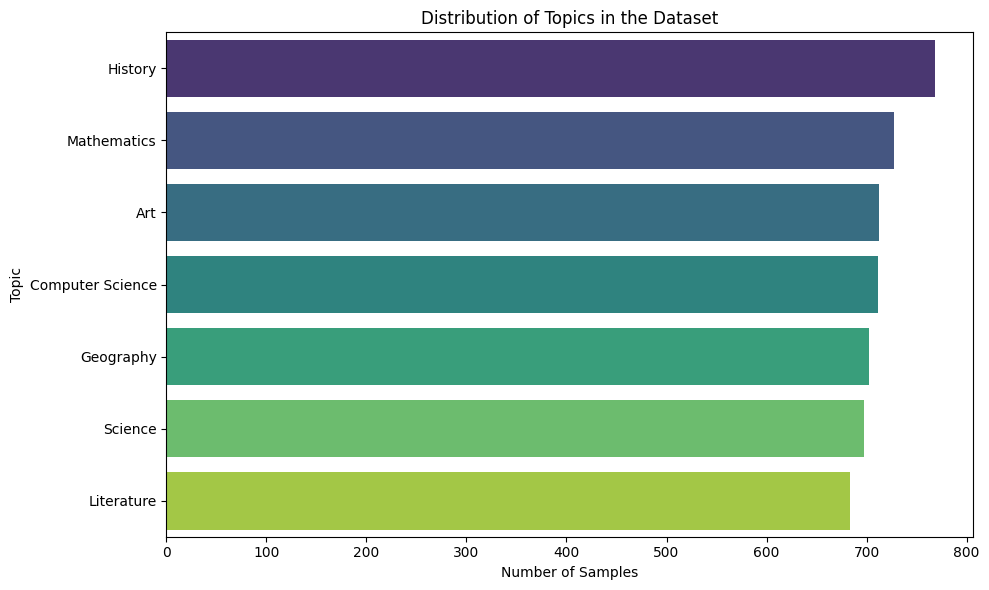

In [63]:
### 2. Topic Distribution
print("\n### 2. Topic Distribution\n")
plt.figure(figsize=(10, 6))
sns.countplot(y='label', data=topic, order=topic['label'].value_counts().index, palette='viridis')
plt.title('Distribution of Topics in the Dataset')
plt.xlabel('Number of Samples')
plt.ylabel('Topic')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


### 3. Text Length Analysis



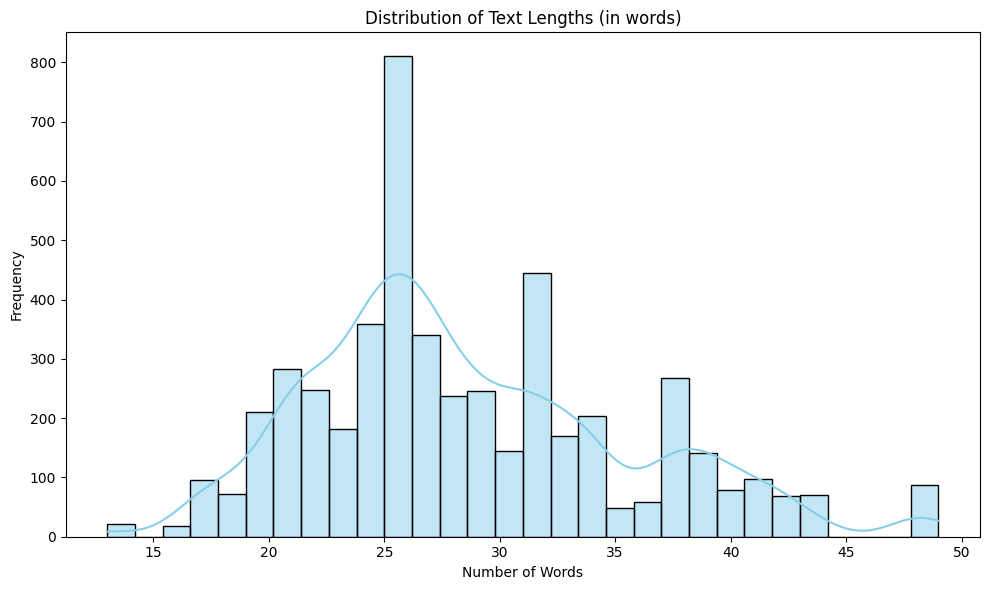


Text Length Descriptive Statistics (in words):
count    5000.000000
mean       28.559400
std         6.884588
min        13.000000
25%        24.000000
50%        27.000000
75%        33.000000
max        49.000000
Name: text_length, dtype: float64


In [66]:
### 3. Text Length Analysis
print("\n### 3. Text Length Analysis\n")
topic['text_length'] = topic['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(topic['text_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Text Lengths (in words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print("\nText Length Descriptive Statistics (in words):")
print(topic['text_length'].describe())


In [72]:
print("Loading MNIST dataset for EDA...")
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
print("MNIST dataset loaded.")
print("-" * 30)

Loading MNIST dataset for EDA...
MNIST dataset loaded.
------------------------------


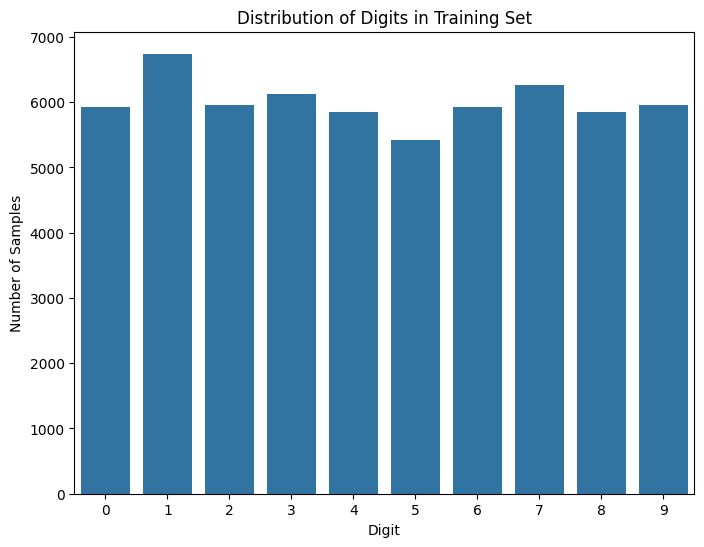

Label distribution plot displayed. Close the plot to continue.
------------------------------


In [78]:
plt.figure(figsize=(8, 6))
sns.barplot(x=list(label_distribution_train.keys()), y=list(label_distribution_train.values()))
plt.title('Distribution of Digits in Training Set')
plt.xlabel('Digit')
plt.ylabel('Number of Samples')
plt.show()
print("Label distribution plot displayed. Close the plot to continue.")
print("-" * 30)

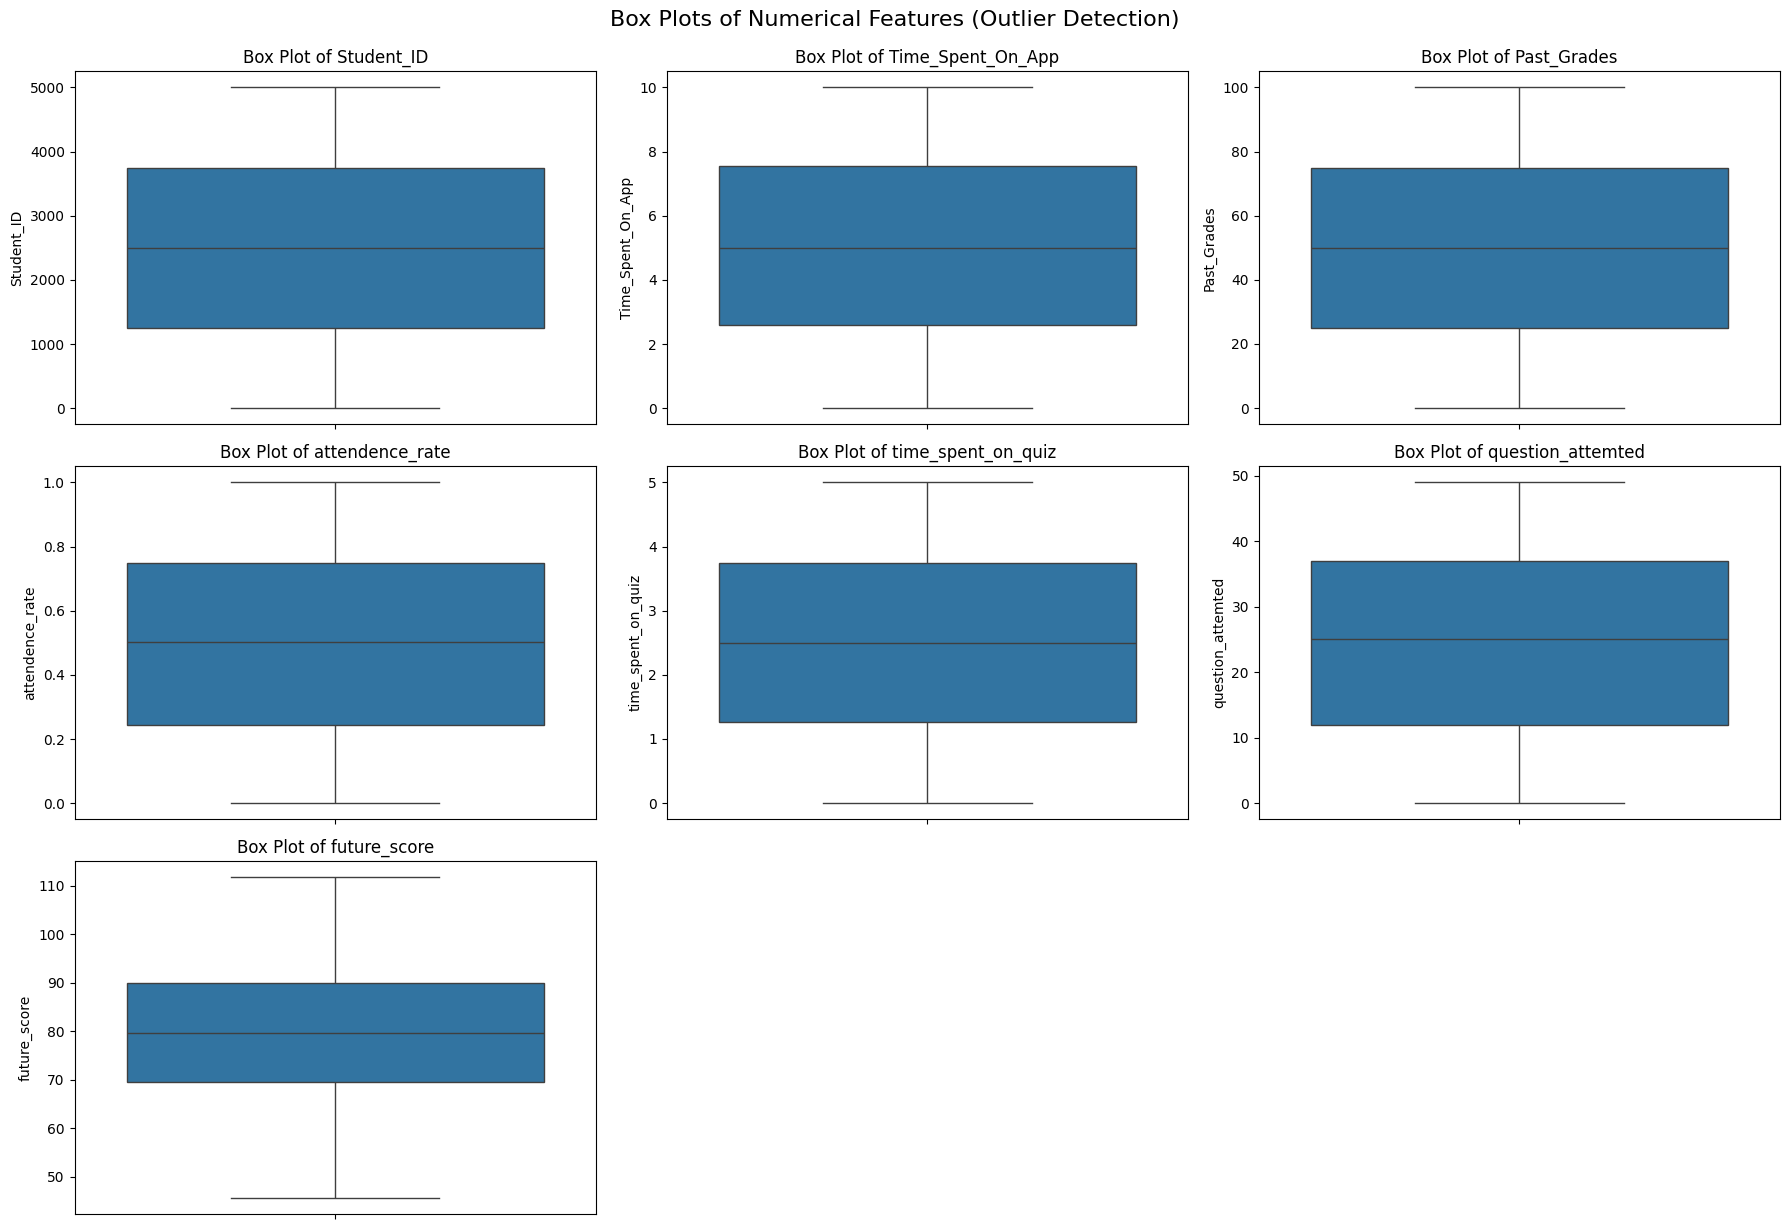

In [80]:
numerical_cols = score_range.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=score_range[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.suptitle('Box Plots of Numerical Features (Outlier Detection)', y=1.02, fontsize=16)
plt.show()


C:\Users\simra\AppData\Local\Temp\ipykernel_13264\2185075755.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=score_range, x=col, palette='viridis')
C:\Users\simra\AppData\Local\Temp\ipykernel_13264\2185075755.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=score_range, x=col, palette='viridis')


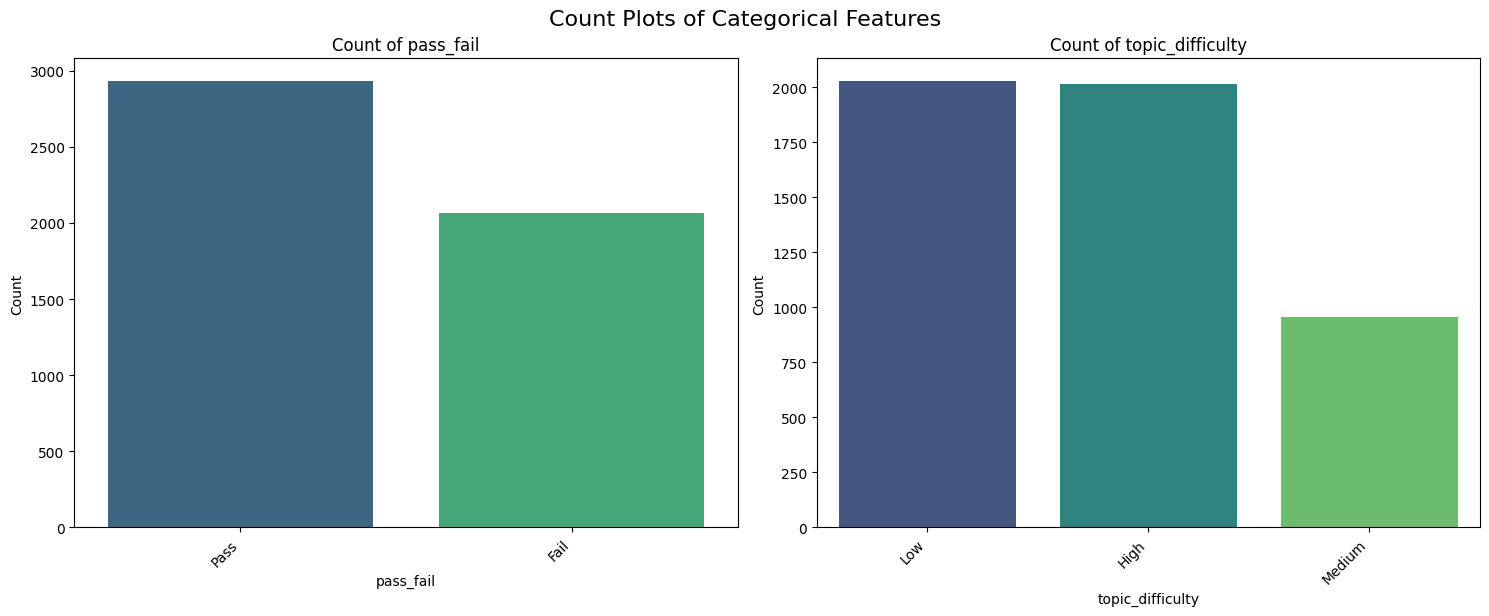

In [81]:
categorical_cols = score_range.select_dtypes(include='object').columns.tolist()

plt.figure(figsize=(15, 6))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, len(categorical_cols), i + 1)
    sns.countplot(data=score_range, x=col, palette='viridis')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.suptitle('Count Plots of Categorical Features', y=1.02, fontsize=16)
plt.show()